# 311 Requests

# Introduction
The sub-metric I decided to use for this project is the amount of 311 requests made. A 311 request is a non-emergency call used to request information, request for a service, or to make a complaint to the city goverment. Within the data gathered from https://data.wprdc.org/dataset/311-data, I am measuring which neighborhoods requests were made from, and the frequency at which they were made in order to determine which one is the "best"

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

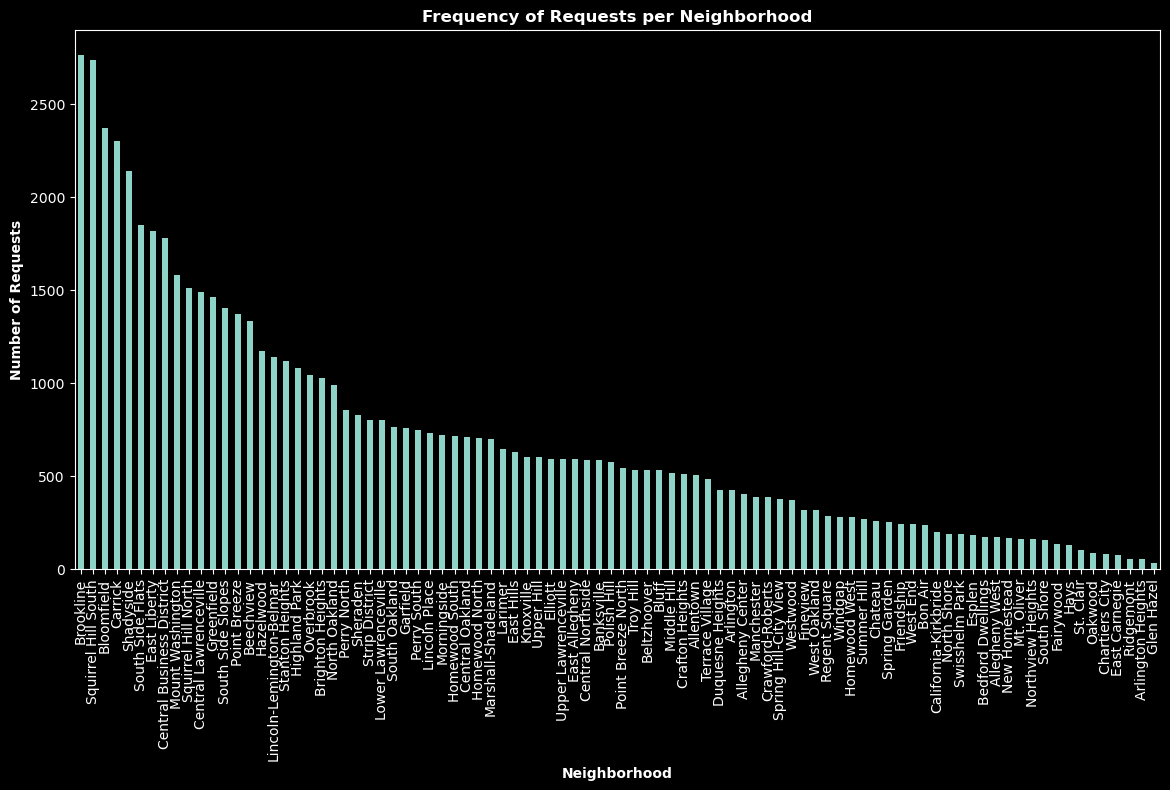

In [22]:
#reads csv from a file path, converts csv to a data frame for further use
entry=pd.read_csv("311.csv")
data=pd.DataFrame(entry)


#This makes use of the dropna() method which is a pandas method to return a new
#data frame, dropping all missing values within the data frame. This is useful
#because my focus on this data is entires 
filtered_data=data.dropna()
#Keeps count of the amount of times each neighborhood made a call
frequency = filtered_data['neighborhood'].value_counts()


#sets a screen size to represent what you want to plot
plt.figure(figsize=(14, 7))


#PLots the filtered data as a bar graph
frequency.plot(kind='bar')

#Set labels for my graph, titling the graph, x and y axis, and setting the font to be bolded
plt.title('Frequency of Requests per Neighborhood', fontweight='bold')
plt.xlabel('Neighborhood', fontweight='bold')
plt.ylabel('Number of Requests', fontweight='bold')



plt.show()


The above graph takes a filtered version of our data which includes all of the entries with a recorded neighborhood. It then makes use of matplot to plot the frequencies on a bar graph. As we can see, however, this data looks rather unwieldy.

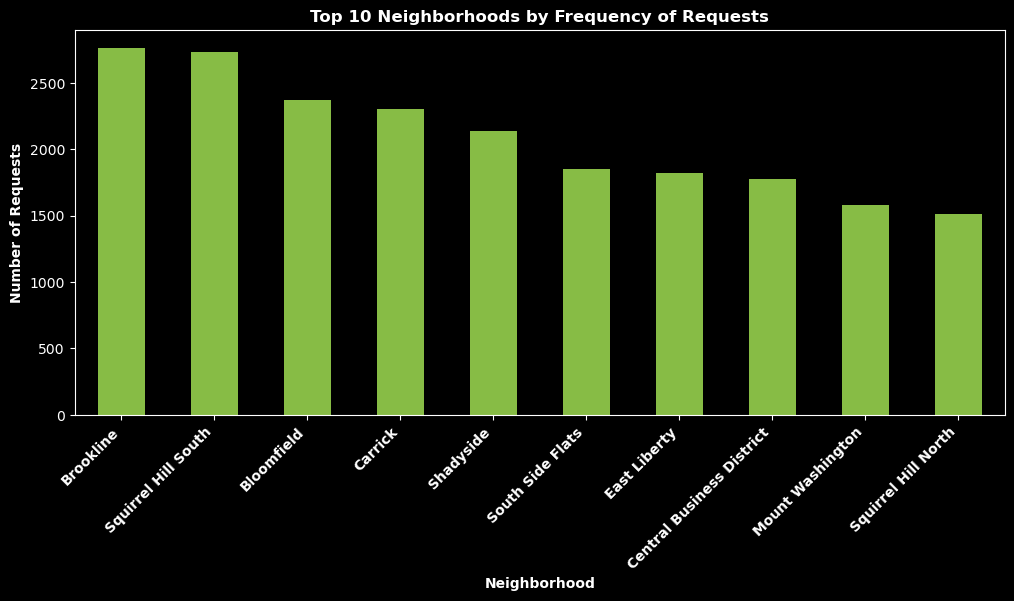

In [20]:
#This section of my code and the two following graphs help to clarify the data further, showing the disparity between
#the 10 neighborhoods with the highest amount of calls, and the 10 neighborhoods with the smallest amount of calls


top_10 = frequency.head(10)
bottom_10 = frequency.tail(10)


# Plotting the top 10 frequencies
plt.figure(figsize=(12, 5))
top_10.plot(kind='bar', color='#87bc45')
plt.style.use('dark_background')
plt.title('Top 10 Neighborhoods by Frequency of Requests', fontweight= 'bold')
plt.xlabel('Neighborhood', fontweight='bold')
plt.ylabel('Number of Requests', fontweight='bold')
plt.xticks(rotation=45, ha='right', fontweight='bold')

plt.show()

Let's take a closer look at the top 10 most frequent callers. Making use of pandas ".head()" function we can isolate the data that shows the highest frequency. From this data it can be safe to assume that we can kick these neighborhoods out of the running for "best".

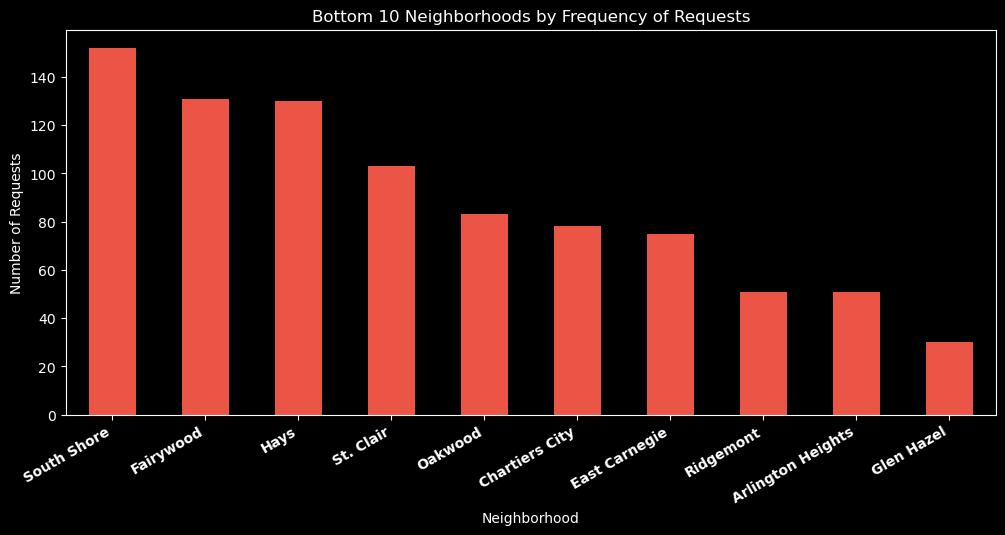

In [16]:
# Plotting the lower ten results
plt.figure(figsize=(12, 5))
bottom_10.plot(kind='bar', color="#ea5545")
plt.style.use('dark_background')
plt.title('Bottom 10 Neighborhoods by Frequency of Requests')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Requests')
plt.xticks(rotation=30, ha='right', fontweight='bold')
plt.show()

Now, let's look at the bottom 10, from this bar graph we can see that these neighborhoods according to my metric. This graph contains our running for "best" neighborhoods.

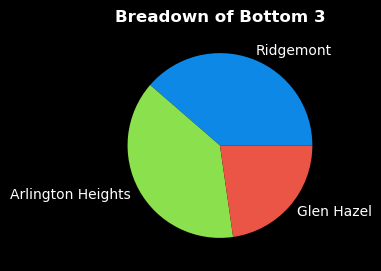

In [18]:
top3=frequency.tail(3)

plt.figure(figsize=(10,3))
colors= ["#0d88e6", "#8be04e", "#ea5545"]
top3.plot(kind='pie', colors=colors)
plt.style.use('seaborn-v0_8-dark-palette')
plt.ylabel(" ")
plt.title("Breakdown of Bottom 3", fontweight= 'bold', ha='center')
plt.show()

In [ ]:
This final pie chart just shows a representation by the size of our top three neighborhoods by size.

# Conclusion

I used data from 311 requests made to the city to prove my overall point of "best neighborhood ". The way I defined the best neighborhood within my data metric was by looking at which neighborhood generally had the least amount of requests made. My idea was that if a specific neighborhood had fewer requests, there were generally fewer "problems" for people to complain about and fewer people that find things to complain about. I started off by taking my data and filtering it by the entries that only contained a neighborhood attached to it. I then used this filtered data frame to create graphs exploring which neighborhoods contain the least complaints. From this data, I came to the conclusion that the neighborhoods with the least amount of complaints were Ridgemont, Arlington Heights, and Glen Hazel. Finally, taking a purely mathematical approach to looking at the best neighborhood, then Glen Hazel is the best.

# Fire Incidents

# Welcome the Fire Incidents Data Set by Dong Kevin

For this Fire Incident Data Set, I shall do a *thorough* detailed examination of all that this DataSet offers. 

**Welcome and sit back** to *enjoy* the show. 


![](https://media4.giphy.com/media/v1.Y2lkPTc5MGI3NjExNWl2OGUzaXNjMTVsbmRhMHNkZWR3YmF1dmp1MDhtOWVodmVnb2JxaiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/5ev3alRsskWA0/giphy.webp)



# SIKE! Before I begin, I shall entertain you all with a brief introduction. 

The sub-metric I have chosen is overall Fire Alarm Calls. 

This Dataset enhances my ability to determine the best neighborhood based on that singular metric. 
In a logical standpoint, the less the amount of fire alarm calls will equate to the better the neighborhood in overall safety. 

*Of course, why would you call the fire department if you didn't have a fire?* So obviously since the fewer the Fire Alarm Calls the better for any neighborhood

**Next Point of Interest...** 

I have chosen this Data Set because it contained a ton of data regarding these neighborhoods, some neighborhoods called the fire alarm more than once therefore there are many logs of them, however, using the experience that I have built up through the previous labs, I was able to figure out a clever way to sort only the total number of neighborhoods and their net sum of fire alarm calls. 

*All in All, I just like math-based data sets...* 

![Kirby](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExZnEwOTlkNjBjYXRycDgydDZnaGc2c3hjZGtvbGwzc2V5YTlsYWVxMCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/wRmOK4J2261gI/giphy.webp)


In [354]:
# IMPORTING THINGS 

import pandas as pd
import matplotlib.pyplot as plt


# I shall now present you a 91-row table detailing all the neighborhoods and their alarm calls 

In [360]:
# Importing the CSV File and Loading it 
file_path = 'FireIncident.csv'  
df = pd.read_csv(file_path)


# Creating a new Grouped Table for only Neighborhoods and Alarms
df_neighborhood_totals = df.groupby('neighborhood')['alarms'].sum().reset_index()

# Table of everything under Neighborhood and Alarms.
pd.set_option('display.max_rows', None)  

# Displays the table
df_neighborhood_totals


,neighborhood,alarms
0,Allegheny Center,26
1,Allegheny West,15
2,Allentown,95
3,Arlington,31
4,Arlington Heights,10
5,Banksville,28
6,Bedford Dwellings,38
7,Beechview,84
8,Beltzhoover,99
9,Bloomfield,105


The above graph displays each of the 91 neighborhoods and their respective number of Fire alarm Calls

# Here now is a bar graph detailing in Descending Order from Greatest to Least calls from each individual neighborhood. 

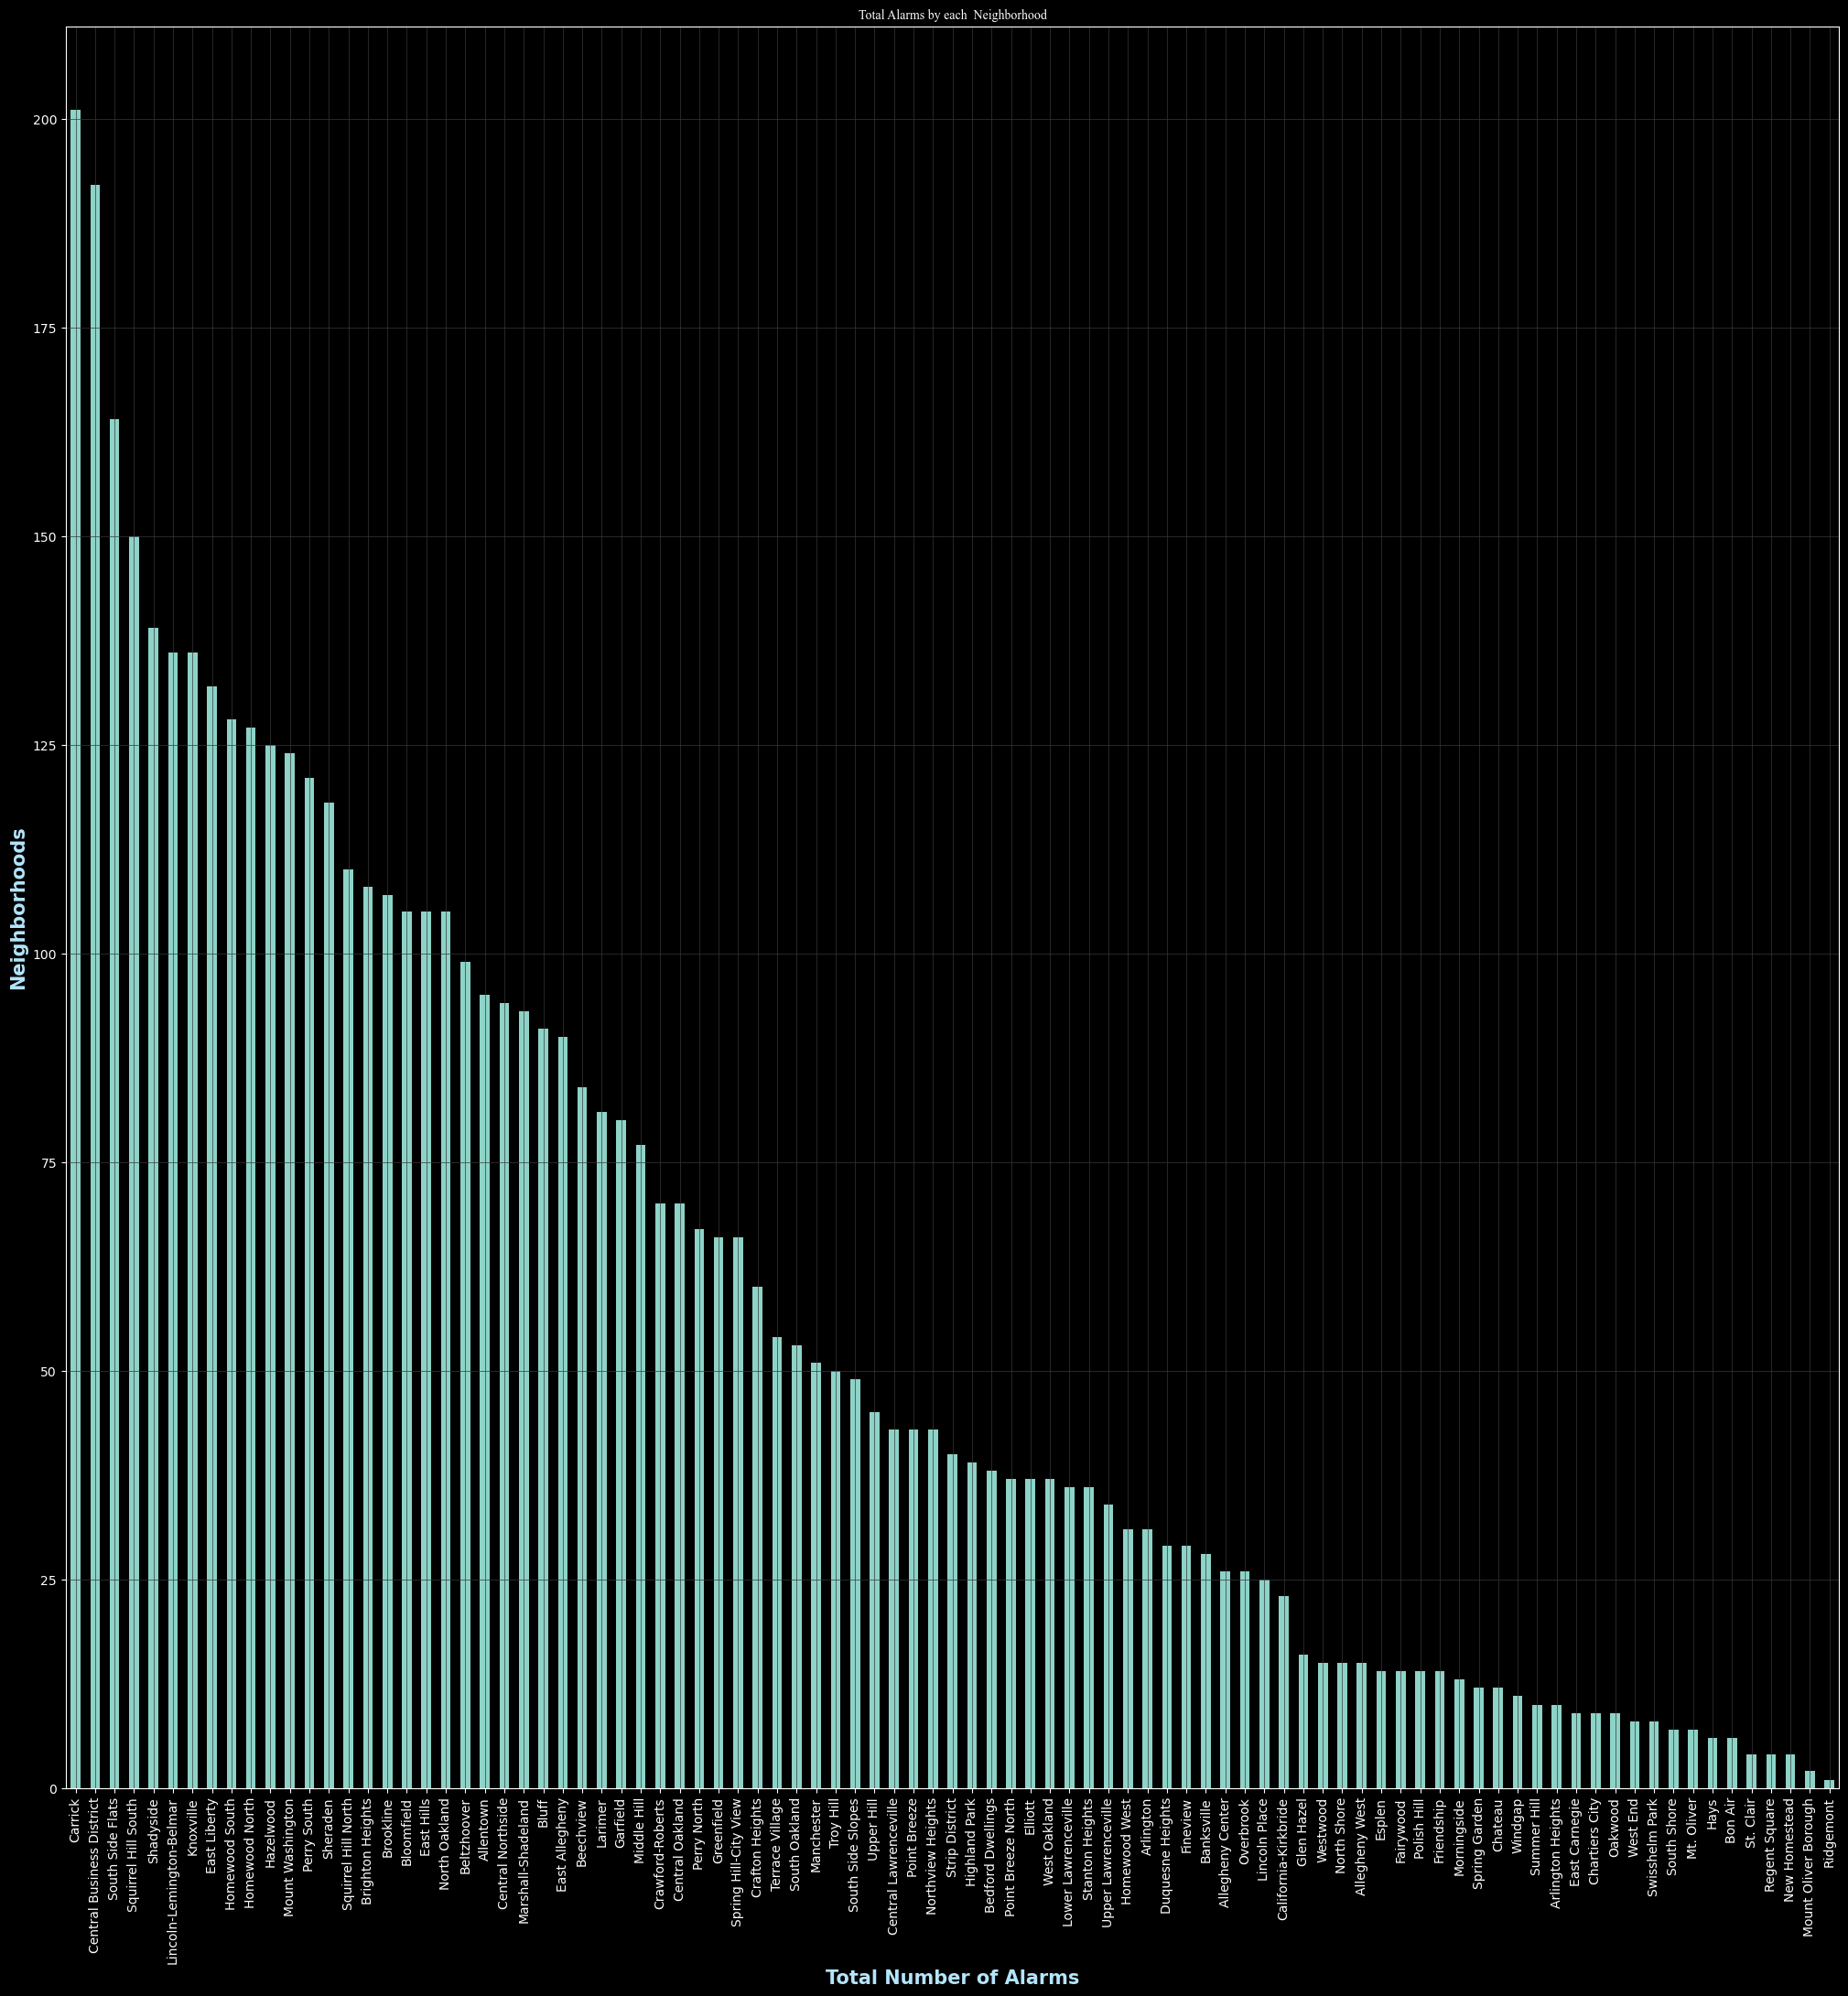

In [386]:
# This is the window size
plt.figure(figsize=(25, 25))

# This sorts the neighborhoods in descending order
df_neighborhood_totals = df_neighborhood_totals.sort_values(by='alarms', ascending=False)
df_neighborhood_totals.set_index('neighborhood')['alarms'].plot(kind='bar')

# Cool Fonts and Bold
plt.title('Total Alarms by each  Neighborhood', font="Times New Roman")
plt.xlabel('Total Number of Alarms', color='#B3E5FC', fontsize=15, fontweight='bold')
plt.ylabel('Neighborhoods', color='#B3E5FC', fontsize=15, fontweight='bold')
plt.style.use('dark_background')

plt.grid(color='#353839', linewidth=0.5)


plt.show()

This bar graph above displays from left to right, the greatest number of Fire Alarm calls to their respective neighborhood to the least amount of Fire Alarm Calls.

# I shall now list you another BAR GRAPH 

Descending order Bar Graph that displays how each neighborhood scales against one another. 

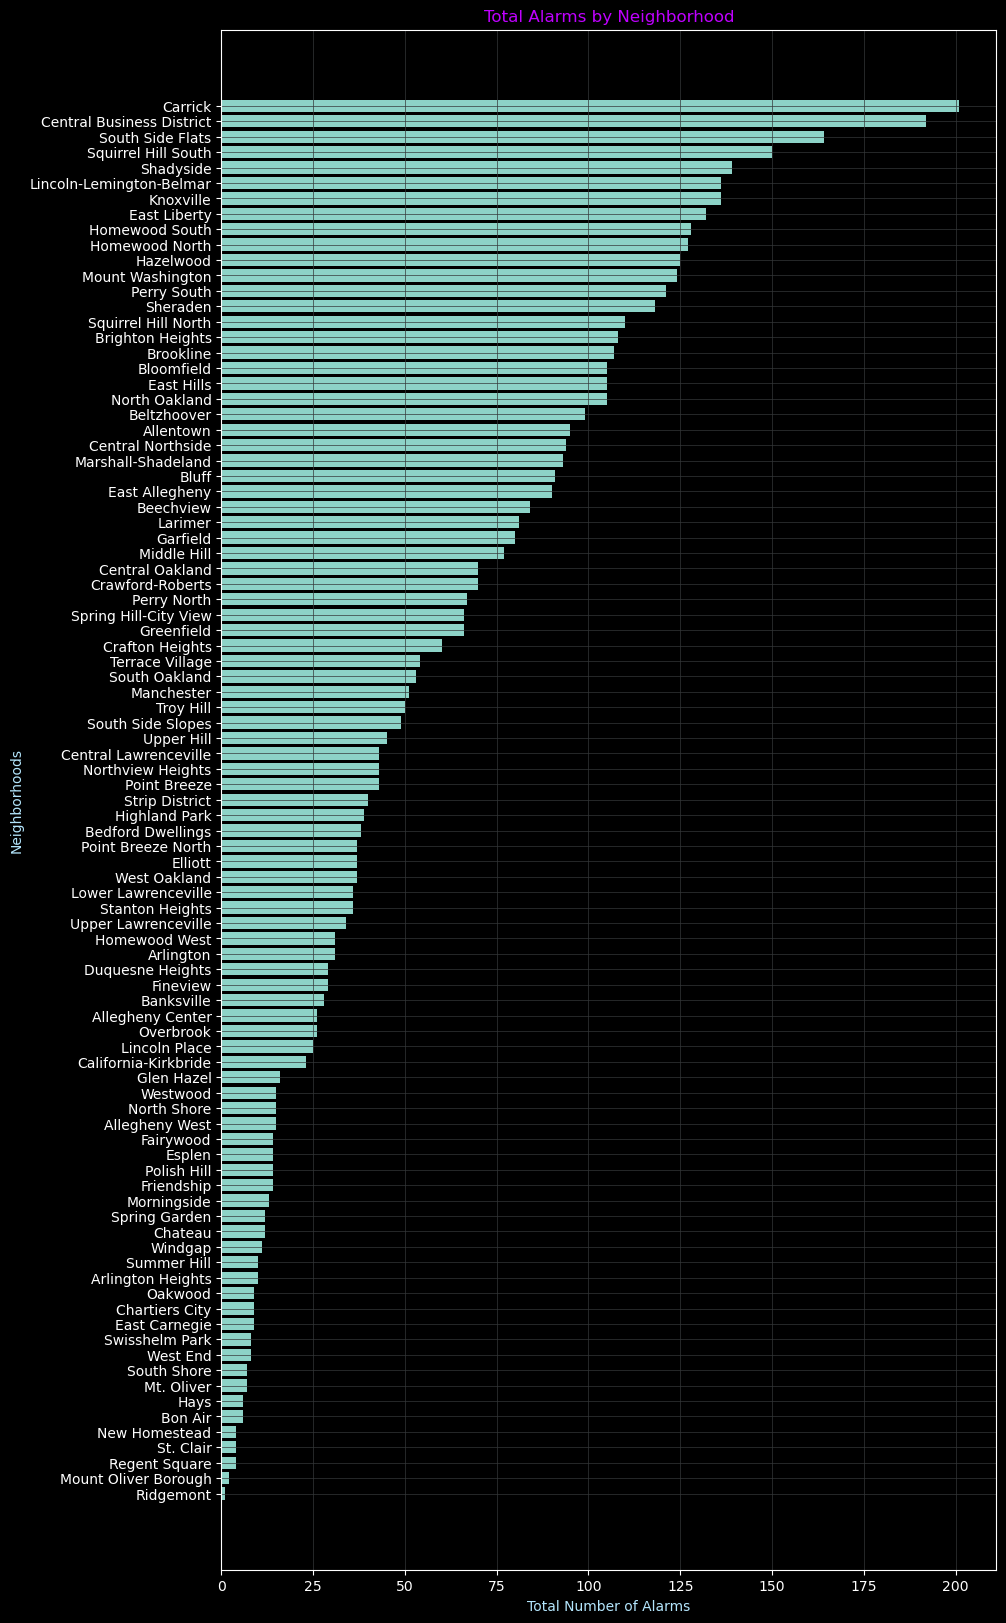

In [406]:
# Sorted the Neighborhoods from Most to Least
df_neighborhood_totals = df_neighborhood_totals.sort_values(by='alarms', ascending=True)

# Window Size
plt.figure(figsize=(10, 20))
plt.barh(df_neighborhood_totals['neighborhood'], df_neighborhood_totals['alarms'])

# Cool Fonts
plt.title('Total Alarms by Neighborhood', color ='#BF00FF')
plt.xlabel('Total Number of Alarms', color='#B3E5FC')
plt.ylabel('Neighborhoods', color='#B3E5FC')


plt.grid(color='#353839', linewidth=0.5)


plt.show()


# PIE CHARTTTTT

Just a simple pie chart that displays all the neighborhoods with respect to the amount of fire alarm calls they possess. 

The greater the slice, the more likely there are fires. 

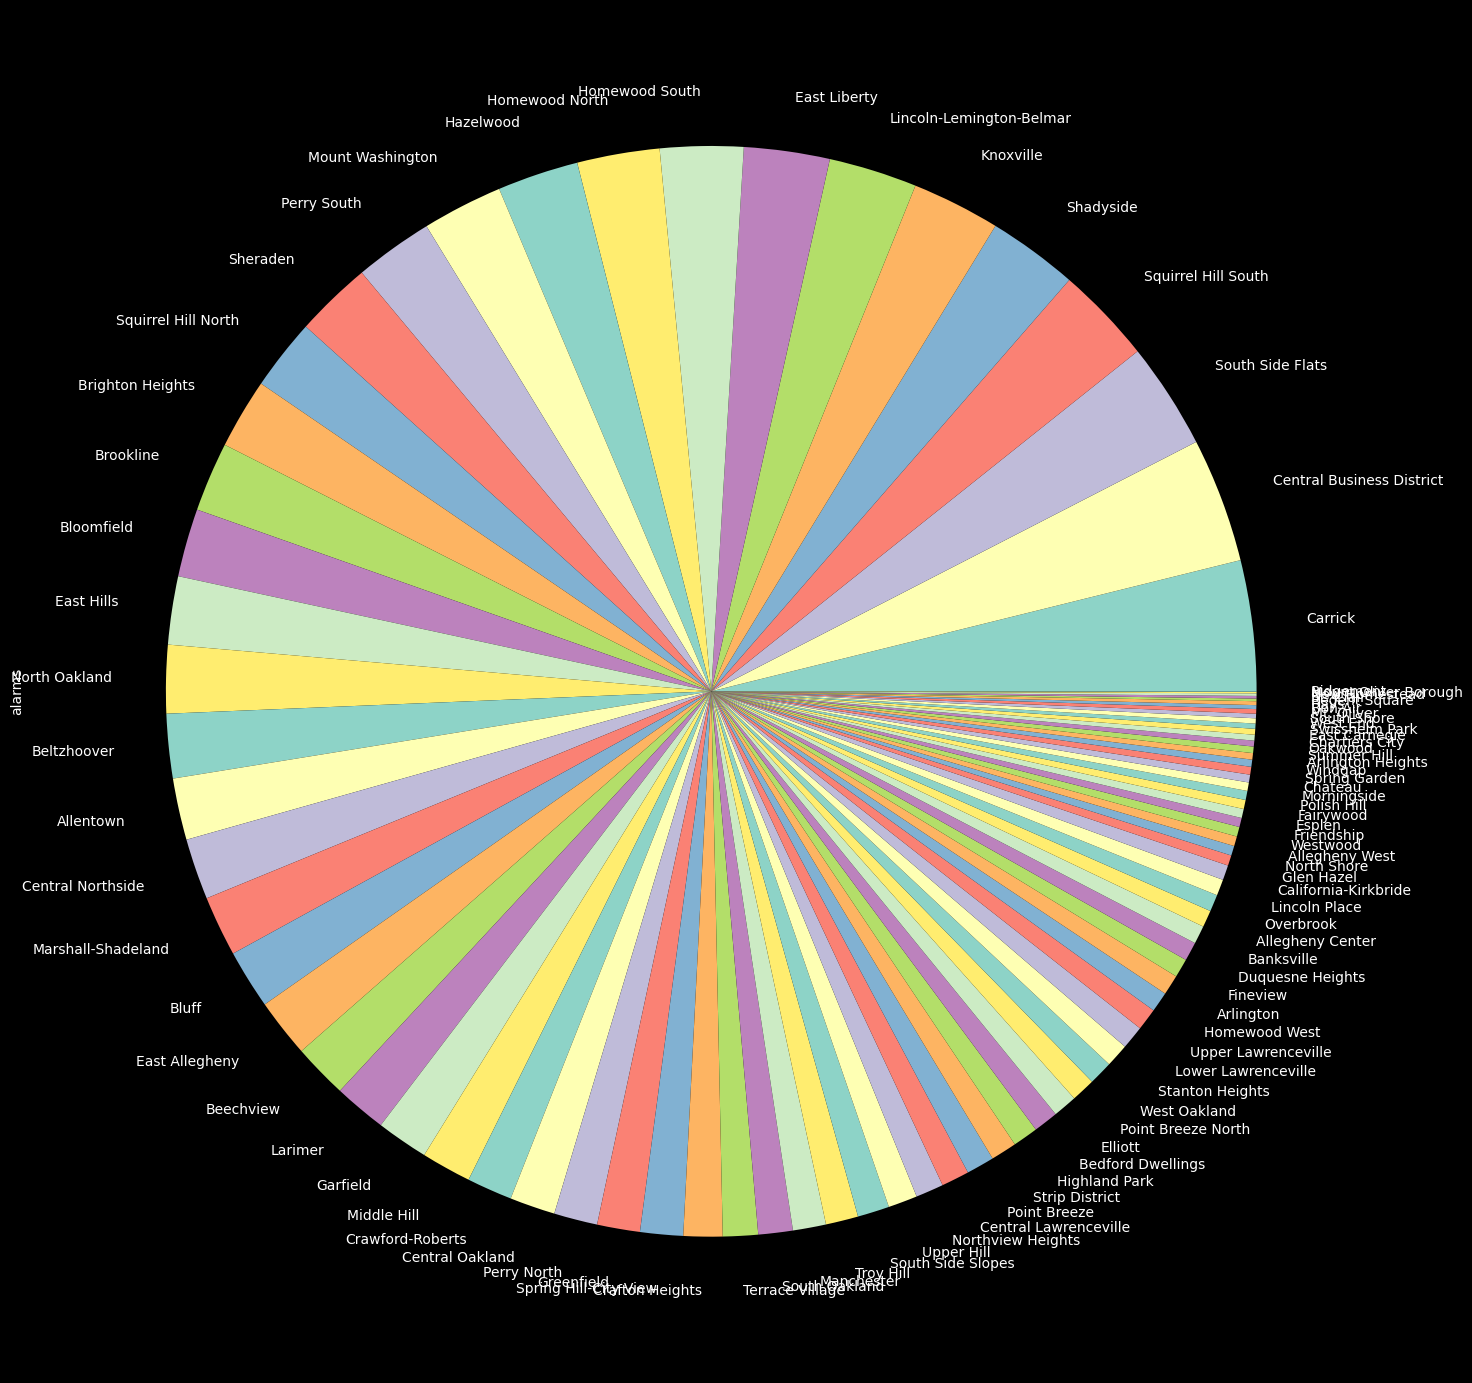

In [342]:
plt.figure(figsize=(15, 15))
df_neighborhood_totals.set_index('neighborhood')['alarms'].plot(kind='pie')
plt.style.use('dark_background')
plt.tight_layout() ## Makes Sure that all the Names of the Neighborhoods aren't super cut off
plt.show()


In [396]:
# List the best NEIGHRBORHOOD

lowest_alarms = df_neighborhood_totals[df_neighborhood_totals['alarms'] == df_neighborhood_totals['alarms'].min()]
lowest_alarms.tail(5)


,neighborhood,alarms
67,Ridgemont,1


# Conclusion 


From this beautiful data set, I have deduced that the absolute best neighborhood is Ridgemont. The reason for this conclusion boils down to the fact that it only has 1 fire alarm call. This one singular fire alarm call is the lowest produced from this entire data set, which keep in mind, only reports fire alarm calls and their neighborhood. 

I personally have never seen any of these neighborhoods in my entire life, however judging off names, I really like Garfield the most. Clearly Garfield and Ridgemont are **different**, however, after observing the Data Set, I realized that I had made a grave mistake in choosing Garfield. 

**Garfield** has ***80*** fire alarm calls as compared to the Ridgemont. In my opinion *and simple mathematics*, Garfield is 80x more likely to get fires than Ridgemont, thus making *Ridgemont* the best neighborhood in this entire DATA SET!!!!





# Arrest Data

# Arrests in Pittsburgh 

The data set being used below is https://data.wprdc.org/dataset/arrest-data/resource/e03a89dd-134a-4ee8-a2bd-62c40aeebc6f. 
The data contains the arrests in each neighborhood through the course of 8 years. The metric in this case is the arrests determining the safety of neighborhoods.

In [27]:
# Convert 'Arrests' column to numeric, forcing errors to NaN
df['ARRESTTIME'] = pd.to_numeric(df['ARRESTTIME'], errors='coerce')

# Verify the conversion
print(df['ARRESTTIME'].dtype)


float64


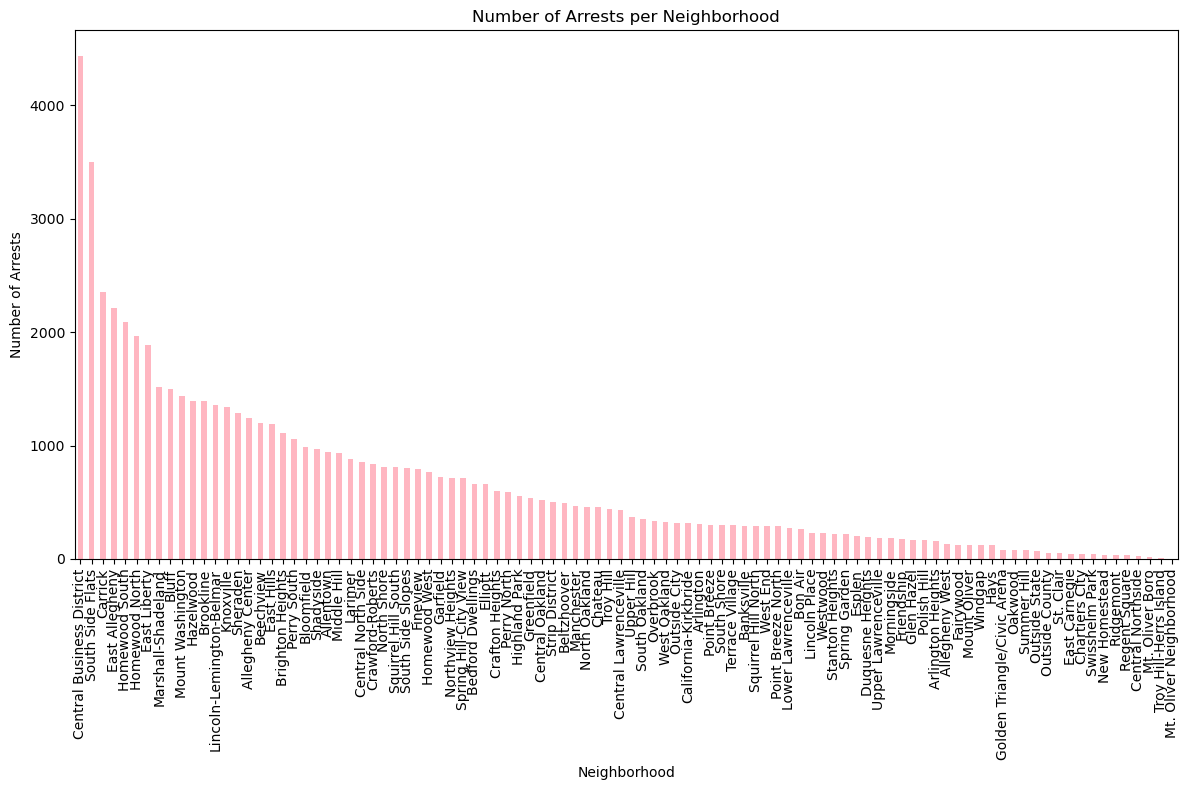

In [51]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Arrests.csv')

# Count the number of arrests per neighborhood
arrests_per_neighborhood = data['INCIDENTNEIGHBORHOOD'].value_counts()

# Plot the data
plt.figure(figsize=(12, 8))
arrests_per_neighborhood.plot(kind='bar', color='lightpink')
plt.title('Number of Arrests per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show() 

The data above is a plot of all the arrests recorded in Pittsburgh in the past 8 years. It is recorded in a decending order to help visulaize. 

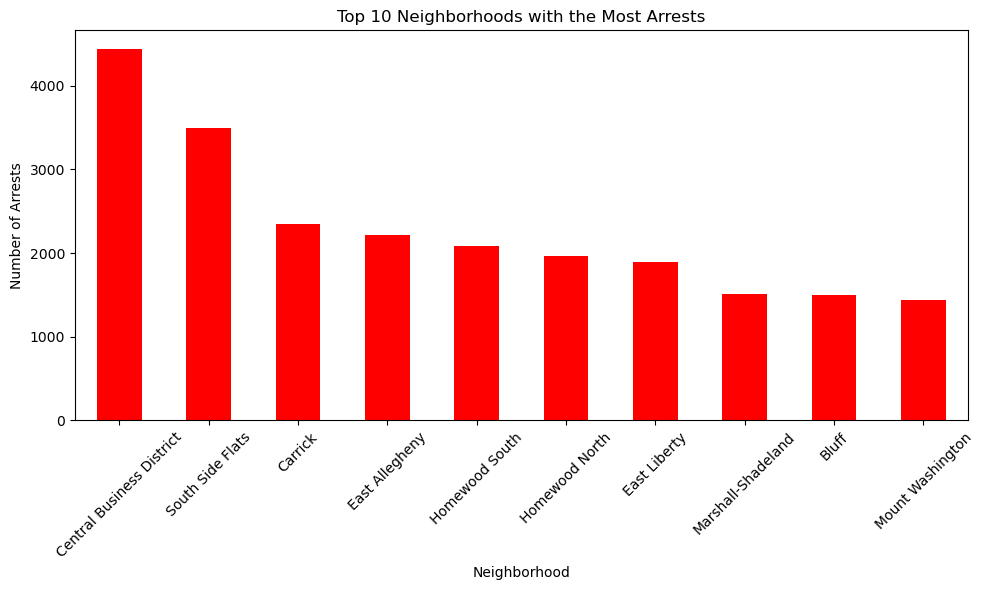

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Arrests.csv')

# Count the number of arrests per neighborhood and select the top 10
top_ten_neighborhoods = data['INCIDENTNEIGHBORHOOD'].value_counts().head(10)

# Plot the top 10 neighborhoods
plt.figure(figsize=(10, 6))
top_ten_neighborhoods.plot(kind='bar', color='red')
plt.title('Top 10 Neighborhoods with the Most Arrests')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The graph above plots the top 10 neighborhoods with the most arrests. This shows the graph the drastic difference with the bottom 10 which is shown below. 

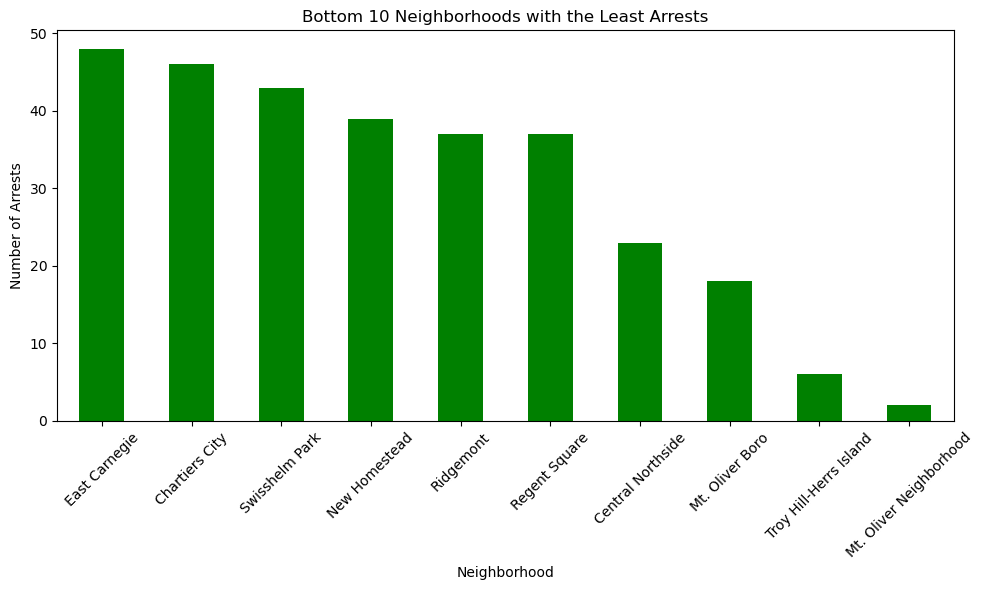

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('Arrests.csv')

# Count the number of arrests per neighborhood and select the bottom 10
bottom_ten_neighborhoods = data['INCIDENTNEIGHBORHOOD'].value_counts().tail(10)

# Plot the bottom 10 neighborhoods
plt.figure(figsize=(10, 6))
bottom_ten_neighborhoods.plot(kind='bar', color='green')
plt.title('Bottom 10 Neighborhoods with the Least Arrests')
plt.xlabel('Neighborhood')
plt.ylabel('Number of Arrests')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Conclusion: The data set I used to help determine the best neighborhood in Pittsburgh was based on arrests around the city. I chose this data because arrests help visualize the danger in these neighborhoods, giving a clear answer on safety in these locations which also connects to our larger metric which is overall safety. When I converted my data set into a graph that showed the number of arrests in each neighborhood, it made it easier to sort through the data and conclude the "safest" neighborhood. The neighborhood in this case is the Mt. Oliver Neighborhood. They have had 3 arrests over the course of 8 years. When comparing this to the most arrests which is Central Buisness District having 4600 arrests, it is clear which one is the safest. 